# Módulo 2: Principales desafíos del Machine Learning
## Ejemplo de preprocesamiento: Titanic Dataset

Veamos un **ejemplo de preprocesamiento** sobre el dataset del famoso barco hundido en el año 1912, el Titanic. 

El dataset brinda información sobre los pasajeros del **Titanic**, como sus edades, género, número de hermanos, esposas, hijos y padres dentro del barco, puntos de embarque y si sobrevivieron o no al desastre. 

En base a estas características, el objetivo de un posible proyecto de Machine Learning podría ser predecir si un pasajero arbitrario en el Titanic sobreviviría o no al hundimiento.

En este primer ejemplo vamos a analizar el dataset, entendiendo mejor los features que lo componen, observando relaciones entre ellos, buscando errores, datos faltantes, entre otros.


En primer lugar, vamos a **importar todas las librerías** necesarias para resolver el problema. Además, definimos el estilo de los gráficos que utilizaremos.

In [2]:
#Importamos todas las librerias necesarias para resolver el problema
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

# Codigo para definir el estilo de los graficos de matplotlib
style.use('fivethirtyeight')
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)

Luego, con el método **.read_csv(file_path)** vamos a cargar el dataset con los datos del Titanic en un pandas.DataFrame y vamos observar los primeros 5 ejemplos con el método **.head()**.

**Aclaración:** Deben reemplazar el file_path con el nombre del directorio donde se encuentra el archivo titanic.csv

In [4]:
# Leemos el archivo .csv 
# ATENCION: REEMPLAZAR POR EL PATH DONDE SE ENCUENTRE EL ARCHIVO
titanic = pd.read_csv('titanic.csv')

# Observamos los 5 primeros elementos
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Observaciones:
Algunas observaciones que podemos extraer de los primeros ejemplos del dataset:
- El dataset cuenta con **features numéricos, features de texto libre y features categóricos**.

- El feature **PassengerId** podría ser el indíce en nuestro DataFrame.

- El Label sería el feature **Survived** que nos dice si ese pasajero sobrevivió (1) o no sobrevivió (0). 

- El resto de las columnas son los features de los cuales nuestro modelo debe aprender.

Veamos que significa cada feature:
- **PassengerId**, es un valor único por pasajero que define su ID
- **Pclass**, es la clase en la que viajaba (1 para primera clase, 2 para segunda clase y 3 para tercera clase)
- **Name**, es el nombre completo del pasajero. Inlcuye el título social (Mr., Miss., etc)
- **Sex**, es el género (masculino, femenino)
- **Age**, la edad
- **SibSp**, describe la cantidad de hermanos/as y esposo/a que viajan también en el barco
- **Parch**, describe la cantidad de padres e hijos que viajan también en el barco
- **Ticket**, es el identificador del pasaje
- **Fare**, es la tarifa que pagó por el pasaje
- **Cabin**, es el identificador de la cabina en la que se alojaba
- **Embarked**, es el puerto de embarque en donde subió al barco. Tiene tres valores posibles: S (Southampton), C (Cherbourg) y Q (Queenstown).

Ahora que tenemos una idea general de cómo esta formado nuestro dataset, comencemos a analizarlo y procesarlo para que quede listo para entrenar un algoritmo de ML.


### Limpieza de datos y análisis inicial

- Para iniciar con nuestro análisis vamos a **definir PassengerId como indice de nuestro DataFrame**

In [5]:
# 1. Seteamos en indice para que sea el id del pasajero
titanic = titanic.set_index('PassengerId')

# Observamos los 5 ultimos elementos
titanic.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


- Observamos la **cantidad de ejemplos y de features** que tiene nuestro dataset

In [6]:
# (Filas x Columnas)
titanic.shape

(891, 11)

- Analizamos los **tipos de datos que representan los features**

In [7]:
titanic.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

#### Observaciones:
- **Name, Sex, Ticket y Cabin, Embarked** son del tipo object, es decir, **texto o valores categóricos**
- **Age y Fare** son del tipo **float** (numéricos reales)
- El resto son valores numéricos **enteros**

- Analizamos **estadísticamente los features numéricos** del dataset usando el método .describe()

In [10]:
# .transpose() es para visualizar la matriz transpuesta (puede obviarse)
titanic.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


- Consultamos la cantidad de **valores faltantes por cada feature**

In [11]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

#### Observaciones
- **Cabin** tiene **687 valores faltantes** de los 891 ejemplos (~77%)
- **Age** tiene **177 valores faltantes** de los 891 ejemplos (~20%)

- Observamos el label y obtenemos la **cantidad de sobrevivientes y cantidad de fallecidos** con el método value_counts() el cual cuenta la cantidad de ejemplos que hay en el dataset de cada clase.

In [12]:
titanic.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

 #### Observaciones
 Del total de pasajeros del dataset: 
 - 549 no sobrevivieron
 - 342 sobrevivieron
 
Este paso (observar los labels con el método value_counts()) en el preprocesamiento es muy importante porque permite verificar si el dataset está **balanceado**, lo cual es clave para entrenar modelos que no estén sesgados hacia una clase. **Si el conjunto de datos está desbalanceado, el modelo podría aprender a predecir siempre la clase mayoritaria**, obteniendo una alta precisión aparente pero un desempeño pobre en las clases minoritarias.

### Extracción de nuevos features
Ahora que tenemos más claridad sobre nuestro dataset usaremos algunos métodos de pandas que nos ayudarán a analizar los features existentes para extraer nuevos.

El método .groupby() agrupa los ejemplos segun los features seleccionados y permite realizar diferentes cálculos de a grupos (contar los elementos agrupados, sumarlos, promediarlos, etc). 

En este caso el objetivo es:
1. Obtener la **cantidad de pasajeros por cada clase**
2. Obtener la **cantidad de sobrevivientes por cada clase**

Nos enfocamos en principio en las clases de las cabinas porque, según la historia que se conoce del hundimiento del Titanic, los pasajeros de clases más bajas tuvieron menos chances de sobrevivir. El objetivo es verificar esto con nuestro dataset. Si ese es el caso, sabremos que Pclass es un feature importante para definir el Label.


- Observamos la **cantidad de pasajeros por clase**. Para ello agrupamos Pclass, junto con el Label. En este caso se usa el método **count()** que cuenta la cantidad de ejemplos por cada grupo


In [13]:
titanic[['Pclass', 'Survived']].groupby('Pclass').count()

,Survived
Pclass,
1,216
2,184
3,491


#### Observaciones
Total de pasajeros por clase:
- **216** pasajeros de **1ra clase**
- **184** pasajeros de **2da clase**
- **491** pasajeros de **3ra clase**

- Observamos la **cantidad de sobrevivientes por clase**. En este caso se usa **sum()**, porque sumamos porque los valores del feature Survived tiene valores de 0 (no sobrevivio), y 1 (sobrevivio). Por lo tanto **sum()** nos dará la cantidad que sobrevivieron, sumando solo los unos.


In [14]:
titanic[['Pclass', 'Survived']].groupby('Pclass').sum()

,Survived
Pclass,
1,136
2,87
3,119


#### Observaciones 
- **136** pasajeros **sobrevivieron de 1ra clase**
- **87** pasajeros **sobrevivieron de 2da clase**
- **119** pasajeros **sobrevivieron de 3ra clase**

### Análisis gráfico
Ahora que vemos en números las cantidades de pasajeros de cada clase y los que sobrevivieron vamos a visualizar gráficamente estás estadísticas usando la librería matplotlib.


- Analizamos **gráficamente la cantidad de pasajeros que sobrevivieron y cantidad de pasajeros que fallecieron**.


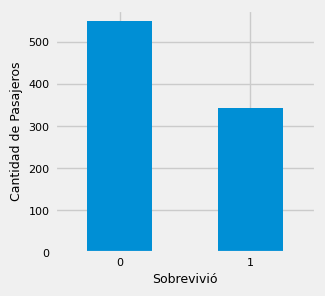

In [15]:
# Fijamos el tamaño del grafico que va a contener los subgraficos 
plt.figure(figsize=(3,3))

# El grafico es del tipo Bar (gráfico de Barras)
figure=titanic.Survived.value_counts().plot(kind='bar')

# Fijamos en 0 el valor de rotación de los ticks del eje x para su mejor visualización (por defecto es 90 grados)
plt.xticks(rotation = 0)

# Definimos los labels para cada eje
figure.set_xlabel('Sobrevivió',fontsize=9)
figure.set_ylabel('Cantidad de Pasajeros', fontsize=9)
plt.show()

- Veamos ahora **gráficamente la cantidad de pasajeros en relación a los siguientes features**:
    - Clase de la cabina
    - Género
    - Puerto de embarque
    - Cant. de Hermanos y/o Esposos
    - Cant. de Padres y/o Hijos

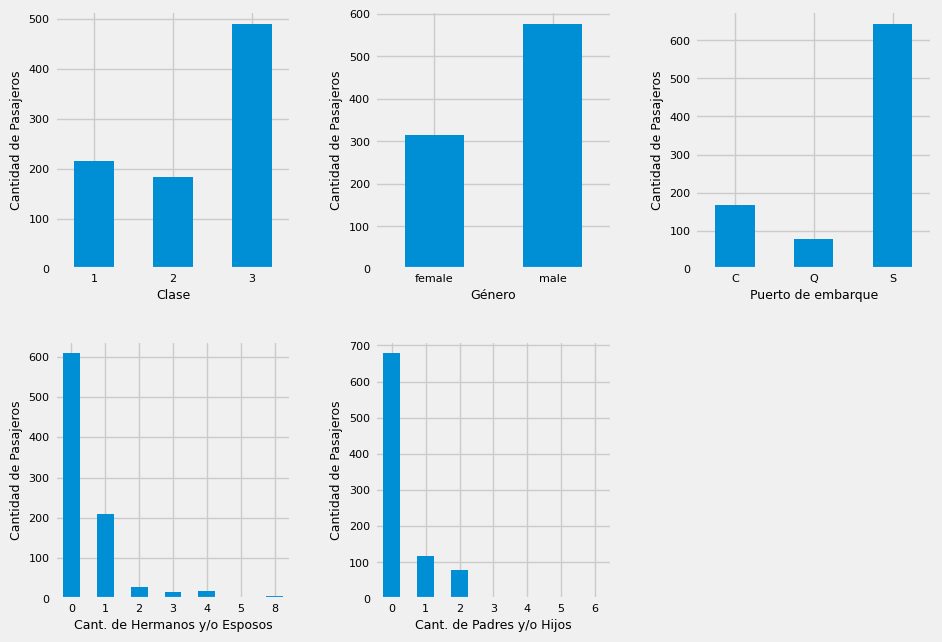

In [17]:
# Fijamos el tamaño del grafico que va a contener los subgraficos 
plt.figure(figsize=(10,7))

# Grafico 1: Cantidad de pasajeros vs. Clase
# Con plt.subplot() Ubicamos el primer gráfico (el primer y segundo argumento de subplot define el tamaño 
# de la grilla que contiene los subgraficos, en este caso 2x3). El ultimo argumento define el indice donde 
# ira ubicado el grafico. En este caso es el primero (arriba a la izquierda)
plt.subplot(2,3,1)
figure = titanic.Pclass.value_counts().sort_index().plot(kind='bar', title='')
plt.xticks(rotation = 0)
figure.set_xlabel('Clase',fontsize=9)
figure.set_ylabel('Cantidad de Pasajeros', fontsize=9)

# Grafico 2: Cantidad de pasajeros vs. Género
plt.subplot(2,3,2)
figure = titanic.Sex.value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation = 0)
figure.set_xlabel('Género',fontsize=9)
figure.set_ylabel('Cantidad de Pasajeros',fontsize=9)

# Grafico 3: Cantidad de pasajeros vs. Puerto de embarque
plt.subplot(2,3,3)
figure = titanic.Embarked.value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation = 0)
figure.set_xlabel('Puerto de embarque',fontsize=9)
figure.set_ylabel('Cantidad de Pasajeros',fontsize=9)

# Grafico 4: Cantidad de pasajeros vs. Cant. de Hermanos y/o Esposos
plt.subplot(2,3,4)
figure = titanic.SibSp.value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation = 0)
figure.set_xlabel('Cant. de Hermanos y/o Esposos',fontsize=9)
figure.set_ylabel('Cantidad de Pasajeros',fontsize=9)

# Grafico 5: Cantidad de pasajeros vs. Cant. de Padres y/o Hijos
plt.subplot(2,3,5)
figure = titanic.Parch.value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation = 0)
figure.set_xlabel('Cant. de Padres y/o Hijos',fontsize=9)
figure.set_ylabel('Cantidad de Pasajeros',fontsize=9)

# Dejamos espacio entre los graficos para mayor legibilidad
plt.tight_layout(pad=2.0)
plt.show()

Puntualmente lo que nos interesa es observar la **probabilidad de sobrevivir segun cada feature**. Analicemos esto según los siguientes features:
- Clase de la cabina
- Género
- Puerto de embarque
- Cant. de Hermanos y/o Esposos
- Cant. de Padres y/o Hijos

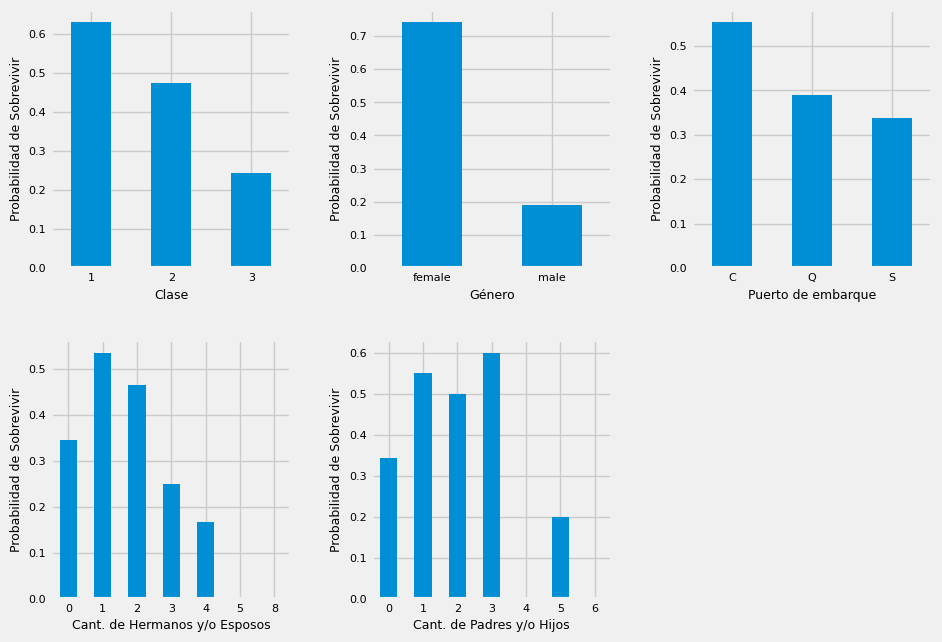

In [18]:
# Vemos gráficamente la probabilidad de sobrevivir en relación a otros features
plt.figure(figsize=(10,7))

# Grafico 1: Probabilidad de Sobrevivir vs. Clase
plt.subplot(2,3,1)
figure = titanic[['Pclass', 'Survived']].groupby('Pclass').mean().Survived.plot(kind='bar')
plt.xticks(rotation = 0)
figure.set_xlabel('Clase',fontsize=9)
figure.set_ylabel('Probabilidad de Sobrevivir',fontsize=9)

# Grafico 2: Probabilidad de Sobrevivir vs. Género
plt.subplot(2,3,2)
figure = titanic[['Sex', 'Survived']].groupby('Sex').mean().Survived.plot(kind='bar')
plt.xticks(rotation = 0)
figure.set_xlabel('Género',fontsize=9)
figure.set_ylabel('Probabilidad de Sobrevivir',fontsize=9)

# Grafico 3: Probabilidad de Sobrevivir vs. Puerto de embarque
plt.subplot(2,3,3)
figure = titanic[['Embarked', 'Survived']].groupby('Embarked').mean().Survived.plot(kind='bar')
plt.xticks(rotation = 0)
figure.set_xlabel('Puerto de embarque',fontsize=9)
figure.set_ylabel('Probabilidad de Sobrevivir',fontsize=9)

# Grafico 4: Probabilidad de Sobrevivir vs. Cant. de Hermanos y/o Esposos
plt.subplot(2,3,4)
figure = titanic[['SibSp', 'Survived']].groupby('SibSp').mean().Survived.plot(kind='bar')
plt.xticks(rotation = 0)
figure.set_xlabel('Cant. de Hermanos y/o Esposos',fontsize=9)
figure.set_ylabel('Probabilidad de Sobrevivir',fontsize=9)

# Grafico 5: Probabilidad de Sobrevivir vs. Cant. de Padres y/o Hijos
plt.subplot(2,3,5)
figure = titanic[['Parch', 'Survived']].groupby('Parch').mean().Survived.plot(kind='bar')
plt.xticks(rotation = 0)
figure.set_xlabel('Cant. de Padres y/o Hijos',fontsize=9)
figure.set_ylabel('Probabilidad de Sobrevivir',fontsize=9)

plt.tight_layout(pad=2.0)
plt.show()

### Feature Selection
Luego de haber analizado gráficamente algunas combinaciones de features vamos a hacer **selección de features**.
Para ello, eliminamos  aquellos que tienen muchos valores faltantes o aquellos que no consideramos de utilidad para el problema:
- **Cabin** se elimina porque tiene demasiados valores faltantes
- **Ticket** (Id de ticket) se elimina por no considerarse relevante 

Con el método **drop** podemos eliminar filas o columnas. Para borrar columnas se pasa como parámetro: axis=1.

<font color='red'>**IMPORTANTE:**</font> Una vez que se ejecutó esta celda, si se vuelve a ejecutar arrojará error, porque las columnas ya fueron eliminadas del DataFrame.

In [19]:
titanic = titanic.drop(['Ticket', 'Cabin'], axis=1)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


### Extracción de Features
Una forma de hacer extracción de features es manualmente crear nuevas features con algunas existentes en el dataset en este caso vamos a crear dos features nuevas:
- **FamilySize**, que es una combinación de **SibSp** (cantidad de hermanos y/o esposa/o) y **Parch** (cantidad de padres y/o hijos) 
- **Title**, para la cual extraeremos del feature **Name** el título social del pasajero (el nombre lo descartamos porque consideramos que no aporta información relevante)

In [20]:
# FamilySize se compone de la cantidad de parientes en el barco + 1 (el pasajero del ejemplo)
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [21]:
# Para crear Title se extrae el título social del nombre del pasajero
titanic['Title'] = titanic.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

# Se elimina el feature Name
titanic = titanic.drop(columns='Name')
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,2,Mr
2,1,1,female,38.0,1,0,71.2833,C,2,Mrs
3,1,3,female,26.0,0,0,7.9250,S,1,Miss
4,1,1,female,35.0,1,0,53.1000,S,2,Mrs
5,0,3,male,35.0,0,0,8.0500,S,1,Mr


- Vemos graficamente como quedó el feature **Title**

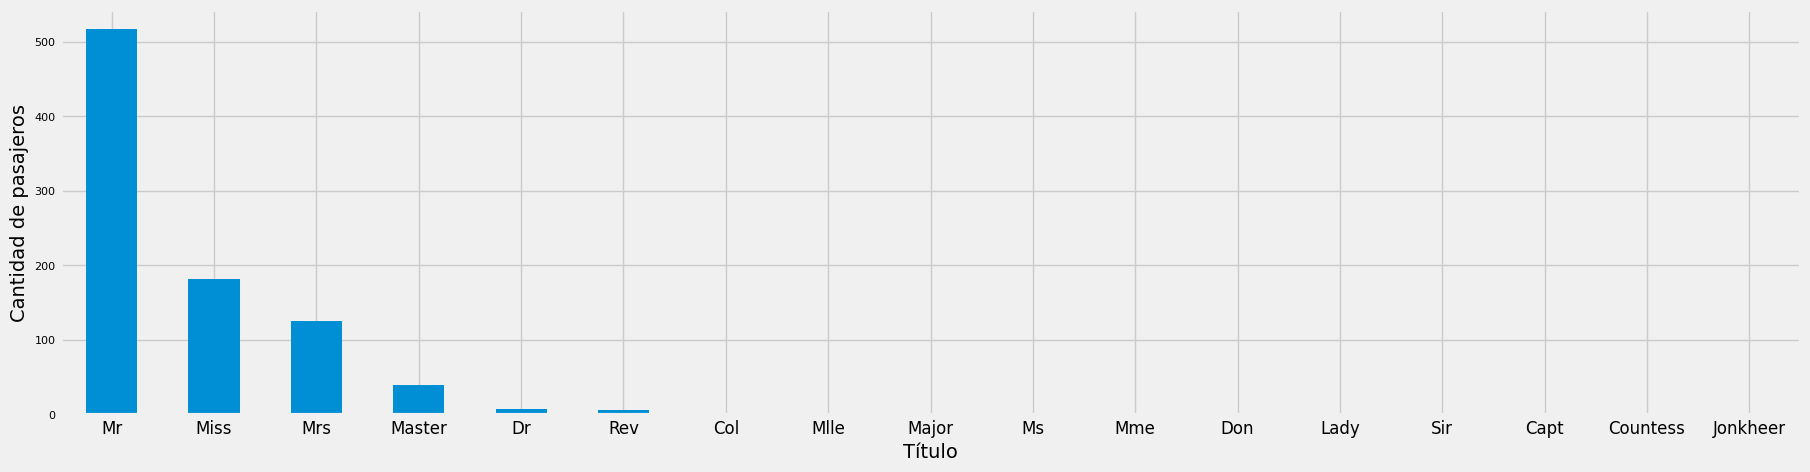

In [22]:
plt.figure(figsize=(20,5))
figure = titanic.Title.value_counts().plot(kind='bar')
plt.xticks(rotation=0, fontsize=12)
figure.set_xlabel('Título',fontsize=14)
figure.set_ylabel('Cantidad de pasajeros',fontsize=14)
plt.show()

- Como tenemos demasiadas clases con pocos ejemplos vamos a combinar algunas de ellas y agrupar a los casos de títulos atípicos en "Others_titles". Además corregimos algunos errores.


In [23]:
# Agrupamos los titulos atipicos en "Others_Titles"
titanic['Title'] = titanic['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others_Titles')

# Corregimos errores para unificar
titanic['Title'] = titanic['Title'].replace('Ms', 'Miss')
titanic['Title'] = titanic['Title'].replace('Mme', 'Mrs')
titanic['Title'] = titanic['Title'].replace('Mlle', 'Miss')
titanic.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,2,Mr
2,1,1,female,38.0,1,0,71.2833,C,2,Mrs
3,1,3,female,26.0,0,0,7.9250,S,1,Miss
4,1,1,female,35.0,1,0,53.1000,S,2,Mrs
5,0,3,male,35.0,0,0,8.0500,S,1,Mr


- Vemos graficamente como quedó el feature **Title** en relación a la cantidad de pasajeros


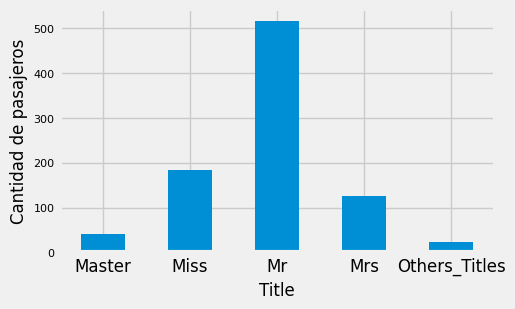

In [24]:
plt.figure(figsize=(5,3))
figure = titanic.Title.value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=0, fontsize=12)
figure.set_xlabel('Title', fontsize=12)
figure.set_ylabel('Cantidad de pasajeros', fontsize=12)
plt.show()

- Vemos graficamente como quedó el feature **Title** en relación a la probabilidad de sobrevivir.


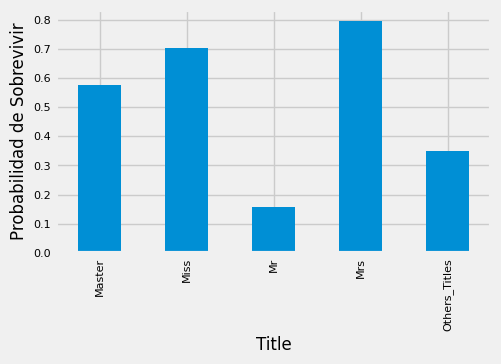

In [25]:
plt.figure(figsize=(5,3))
figure = titanic[['Title', 'Survived']].groupby('Title').mean().Survived.plot(kind='bar')
figure.set_xlabel('Title', fontsize=12)
figure.set_ylabel('Probabilidad de Sobrevivir', fontsize=12)
plt.show()

### Manejo de valores faltantes:  Age y Embarked

Analicemos ahora los features con valores faltantes: **Age** y **Embarked**

Comenzamos observando los valores faltantes del feature **Age**

In [26]:
titanic['Age'].isnull().sum()

np.int64(177)

En el caso de **Age** vamos a llenar los valores faltantes con la edad promedio de las personas que no sobrevivieron

In [29]:
# Buscamos la edad promedio de los pasajeros que no sobrevivieron
titanic['Age'] = titanic.Age.fillna(titanic[titanic.Survived==0].Age.mean())

Observamos los valores faltantes del feature **Embarked**

In [30]:
# Cantidad de valores faltantes de Embarked
titanic['Embarked'].isnull().sum()

np.int64(2)

Analizamos estadísticamente el feature **Embarked**

In [31]:
# Analizamos estadisticamente el feature Embarked
titanic['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

#### Observaciones:
- Vemos que de los 889 valores, hay **3 clases únicas** y la que más se repite es el puerto de **S** (Southampton). Vamos a usar este valor para completar los faltantes

In [32]:
common_value = 'S'
titanic['Embarked'] = titanic['Embarked'].fillna(common_value)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,2,Mr
2,1,1,female,38.0,1,0,71.2833,C,2,Mrs
3,1,3,female,26.0,0,0,7.9250,S,1,Miss
4,1,1,female,35.0,1,0,53.1000,S,2,Mrs
5,0,3,male,35.0,0,0,8.0500,S,1,Mr


Observamos nuevamente la **cantidad valores nulos** por cada feature para confirmar que completamos todos.

In [33]:
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
Title         0
dtype: int64

### Manejo de features categóricos:  Sex, Embarked, Pclass y Title

La mayoría de los algoritmos de ML no pueden manejar datos categóricos, es por ello que hay que transformarlos en valores numéricos. 

Analicemos los features categóricos presentes en el dataset. Para la visualización de features categóricos la librería Seaborn ofrece un gráfico, conocido como **catplot()**, que permite comparar valores categóricos en tan sólo una línea de código.

Analicemos todos los pares de features categóricos del dataset (algunos ofrecen más información que otros)


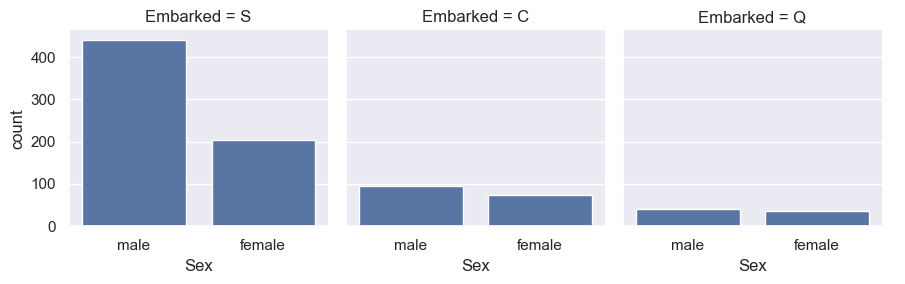

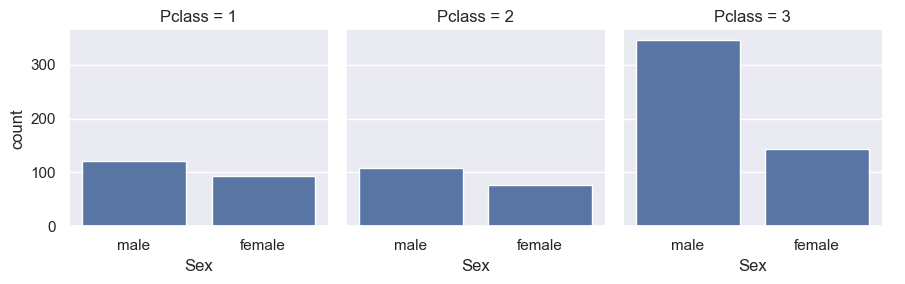

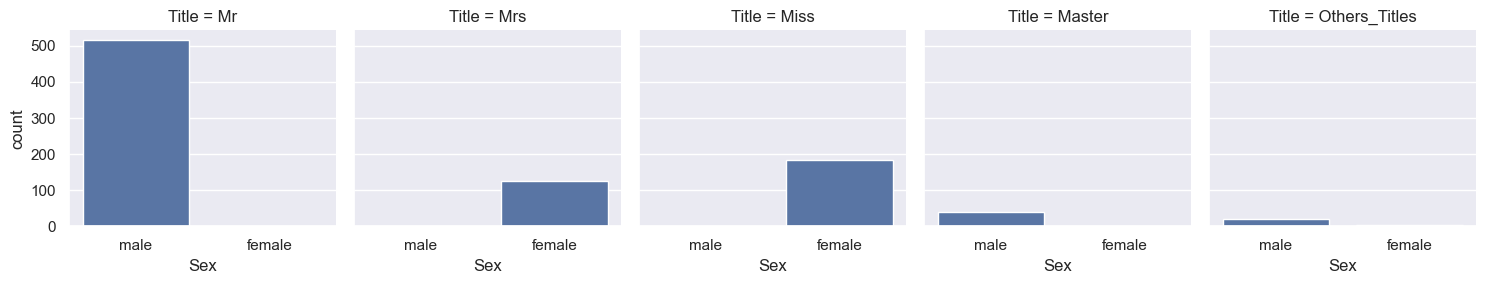

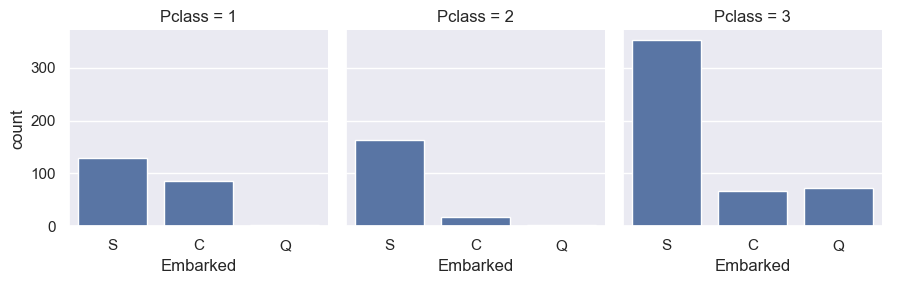

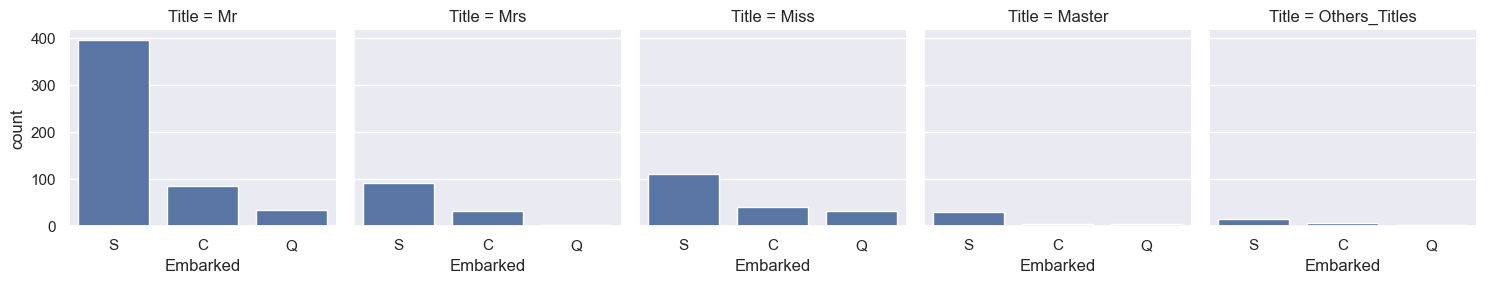

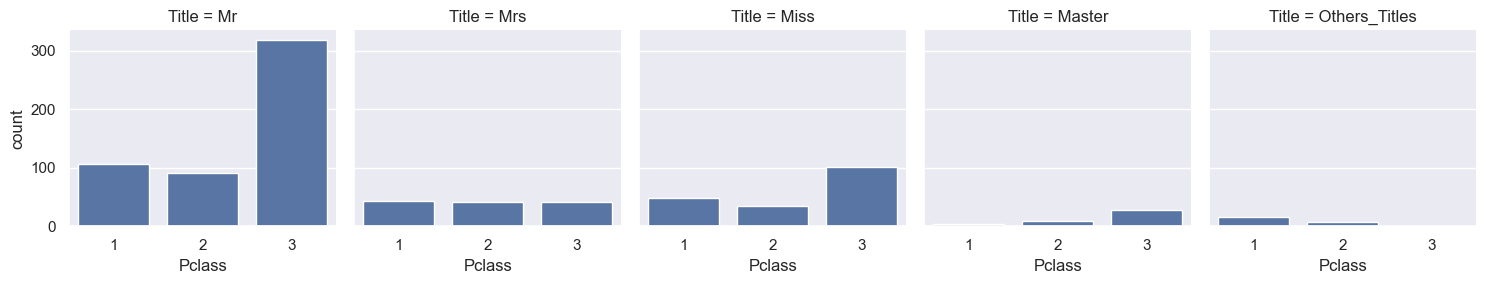

In [34]:
sns.set(font_scale=1)

# Combinamos todos los pares de features categóricos
sns.catplot(x='Sex', col = 'Embarked', data = titanic, kind = 'count', height=3)
sns.catplot(x='Sex', col = 'Pclass', data = titanic, kind = 'count', height=3)
sns.catplot(x='Sex', col = 'Title', data = titanic, kind = 'count', height=3)

sns.catplot(x='Embarked', col='Pclass', data=titanic, kind='count', height=3)
sns.catplot(x='Embarked', col='Title', data=titanic, kind='count', height=3)

sns.catplot(x='Pclass', col='Title', data=titanic, kind='count', height=3)


### One-hot encoding 
Lo primero que vamos a hacer para el manejo de features categóricos es utilizar la técnica de one-hot encoding para **Sex**, **Embarked** y **Title**.

El método get_dummies de pandas nos simplifica la tarea de hacer one-hot encoding en valores categóricos. El primer parámetro define el nombre del feature categórico. Este método va a generar una nueva columna por cada valor categórico del feature (por ejemplo, para el feature Sex va a generar dos nuevas columnas en el dataset: Female y Male).

Primero, hacemos one-hot encoding para el feature **Sex**.

In [35]:
male_female_df = pd.get_dummies(titanic.Sex)

# Renombramos las columnas generadas para unificar formato con el resto
male_female_df.rename(columns = {'male':'Male', 'female':'Female'}, inplace = True)

# Concatenamos las nuevas columnas a nuestro dataset
titanic = pd.concat([titanic, male_female_df], axis=1)

titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title,Female,Male
PassengerId,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,2,Mr,False,True
2,1,1,female,38.0,1,0,71.2833,C,2,Mrs,True,False
3,1,3,female,26.0,0,0,7.9250,S,1,Miss,True,False
4,1,1,female,35.0,1,0,53.1000,S,2,Mrs,True,False
5,0,3,male,35.0,0,0,8.0500,S,1,Mr,False,True


Ahora, realizamos one-hot encoding con el feature **Embarked**


In [40]:
embarked_df = pd.get_dummies(titanic.Embarked, prefix='Embarked')
titanic = pd.concat([titanic, embarked_df], axis=1)
titanic.head()

AttributeError: 'DataFrame' object has no attribute 'Embarked'

Finalmente, realizamos one-hot encoding en el feature **Title**


In [39]:
title_df = pd.get_dummies(titanic.Title)
titanic = pd.concat([titanic, title_df], axis=1)
titanic.head()

AttributeError: 'DataFrame' object has no attribute 'Title'

Eliminamos los features categóricos convertidos a numéricos: **Embarked, Title y Sex**

In [41]:
titanic = titanic.drop(columns='Embarked')
titanic = titanic.drop(columns='Title')
titanic = titanic.drop(columns='Sex')

KeyError: "['Embarked'] not found in axis"

### Análisis de Correlación

Por último, vamos a realizar un **análisis de correlación entre los distintos features numéricos buscando features innecesarios por estar altamente correlacionados con otros**. 
Además podemos observar cuales son los features que mayor correlación presentan con el Label

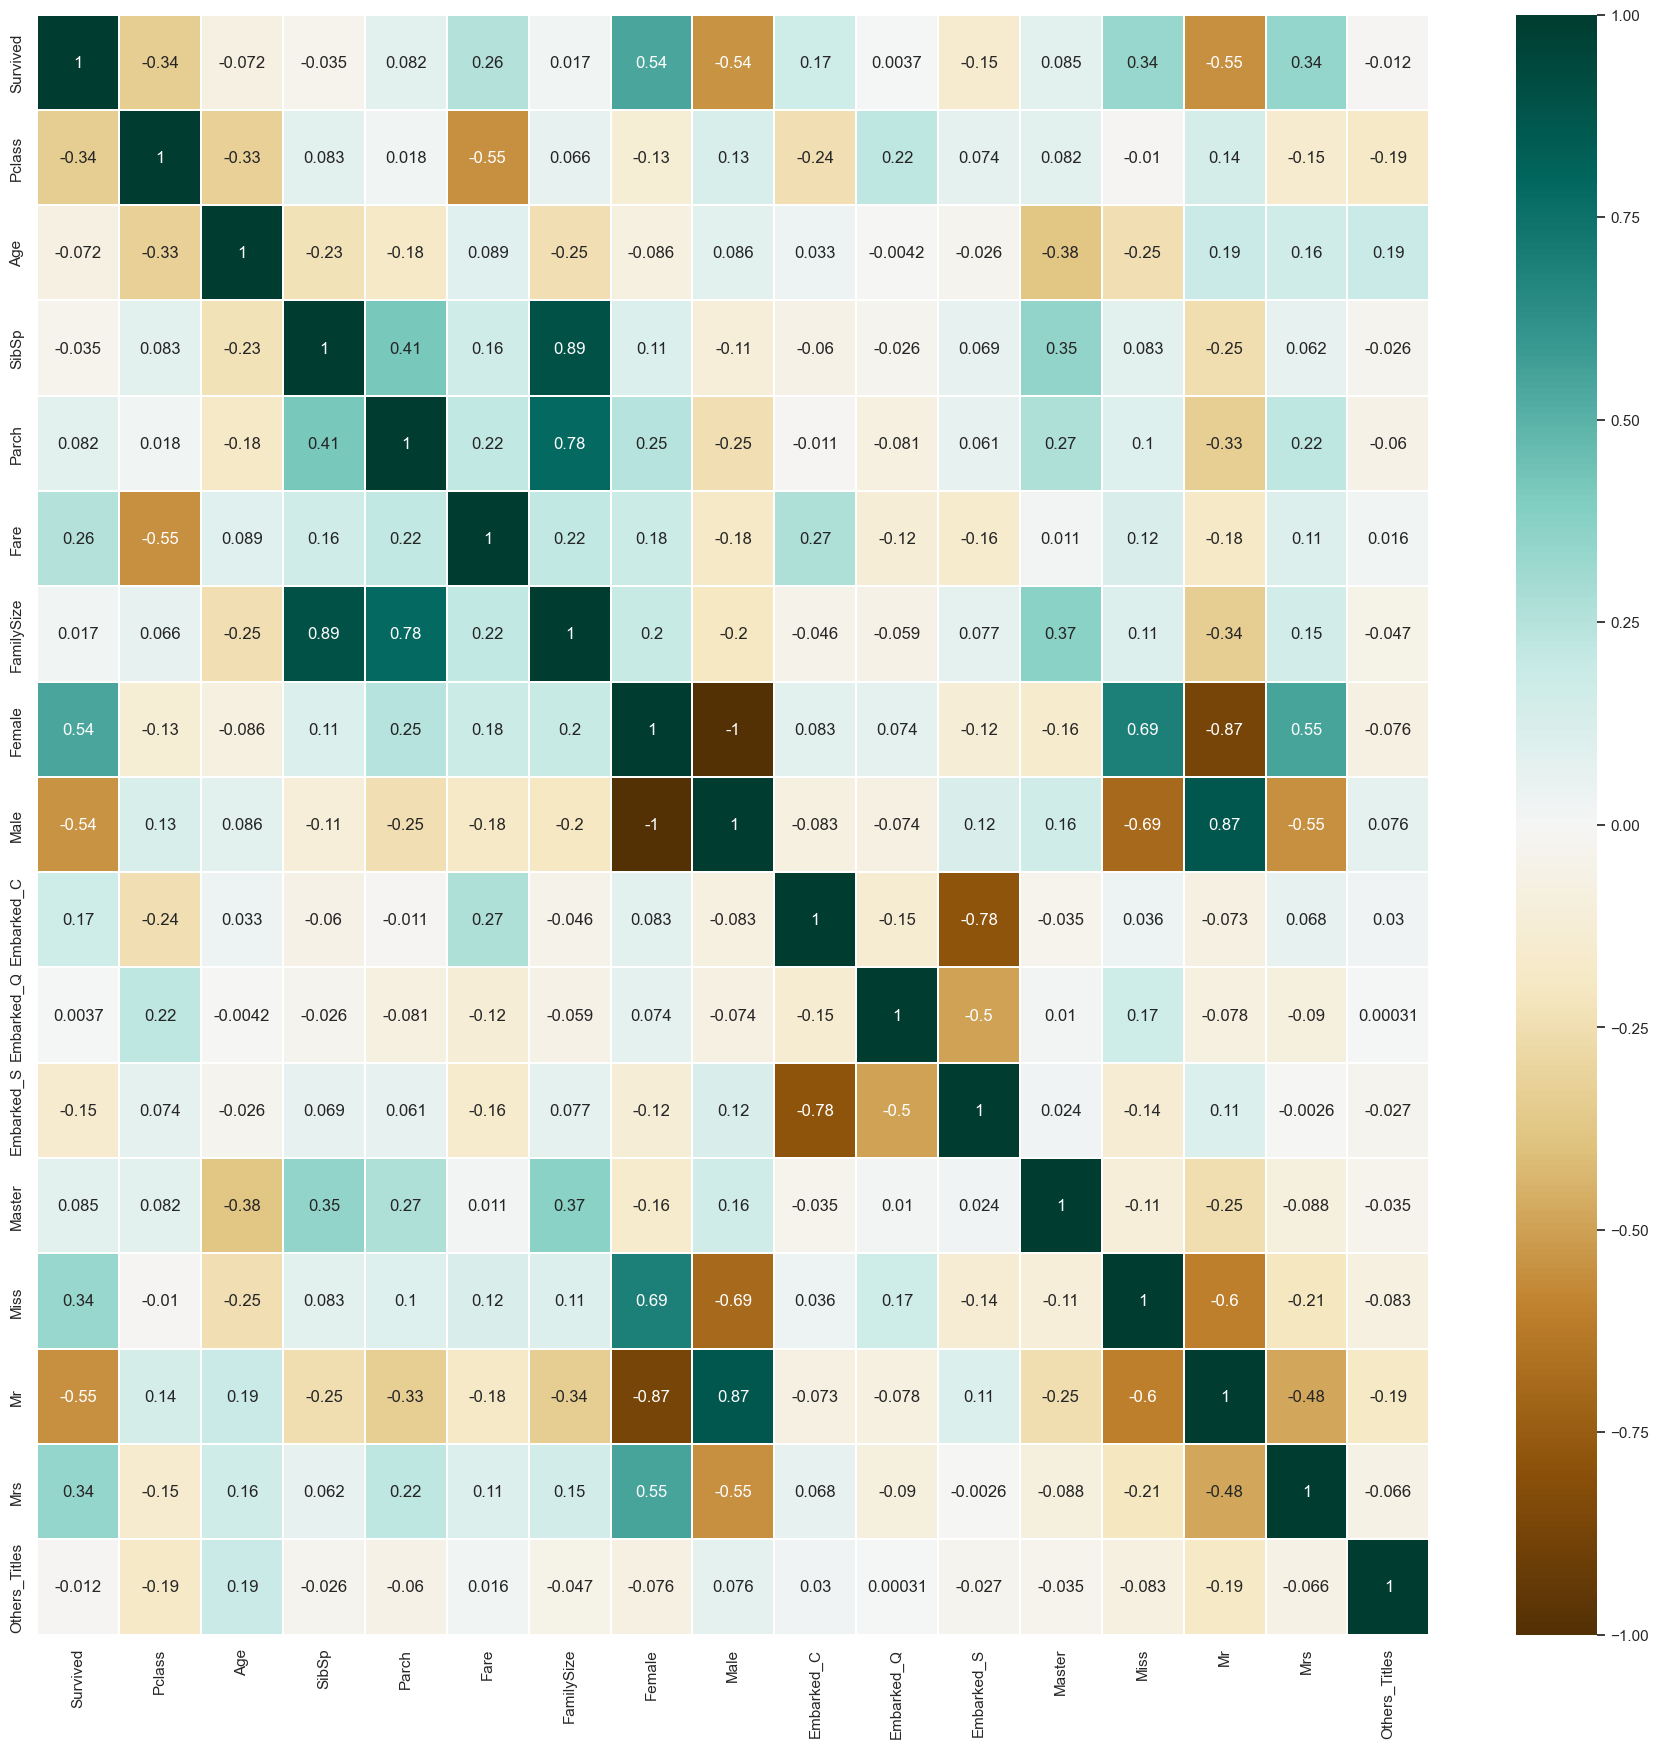

In [43]:
corr_matrix = titanic.corr(numeric_only=True)
plt.figure(figsize=(20, 20))
sns.heatmap(data = corr_matrix,cmap='BrBG', annot=True, linewidths=0.2)
plt.show()

Como es de esperar **SibSp y Parch** estan altamente correlacionados con el feature creado **FamilySize**. 
Es por ello que vamos a eliminar estos features y dejamos solamente el feature creado por nosotros.

In [44]:
titanic = titanic.drop(columns=['SibSp', 'Parch'])

In [45]:
titanic.head()

,Survived,Pclass,Age,Fare,FamilySize,Female,Male,Embarked_C,Embarked_Q,Embarked_S,Master,Miss,Mr,Mrs,Others_Titles
PassengerId,,,,,,,,,,,,,,,
1,0,3,22.0,7.2500,2,False,True,False,False,True,False,False,True,False,False
2,1,1,38.0,71.2833,2,True,False,True,False,False,False,False,False,True,False
3,1,3,26.0,7.9250,1,True,False,False,False,True,False,True,False,False,False
4,1,1,35.0,53.1000,2,True,False,False,False,True,False,False,False,True,False
5,0,3,35.0,8.0500,1,False,True,False,False,True,False,False,True,False,False


Al final del preprocesamiento tenemos un dataset con todos features numéricos lo que nos va a permitir utilizar la mayoría de las técnicas de Machine Learning.

Ahora que tenemos un dataset preprocesado podemos dividirlo en dataset de features (X) y dataset de labels (y)

In [47]:
features = titanic.columns.values[titanic.columns.values !='Survived']

X = titanic[features]
y = titanic[['Survived']]

In [48]:
X.head()

,Pclass,Age,Fare,FamilySize,Female,Male,Embarked_C,Embarked_Q,Embarked_S,Master,Miss,Mr,Mrs,Others_Titles
PassengerId,,,,,,,,,,,,,,
1,3,22.0,7.2500,2,False,True,False,False,True,False,False,True,False,False
2,1,38.0,71.2833,2,True,False,True,False,False,False,False,False,True,False
3,3,26.0,7.9250,1,True,False,False,False,True,False,True,False,False,False
4,1,35.0,53.1000,2,True,False,False,False,True,False,False,False,True,False
5,3,35.0,8.0500,1,False,True,False,False,True,False,False,True,False,False


In [49]:
y.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


Por ultimo, dividimos el dataset en **dataset de entrenamiento**, **dataset de validación** y **dataset de testeo**.

Para ello, importamos el método train_test_split() de Scikit-Learn que facilita el proceso de división del dataset.

Dado que el método train_test_split() solamente divide el dataset en dos (un dataset de entrenamiento y otro de testing) y nosotros queremos tener además un dataset más para realizar la validación de nuestro algortimo antes de hacer el testo final, en este ejemplo utilizamos el método dos veces: 
- Primero, sobre nuestro dataset original para obtener el dataset de entrenamiento (que comprende el 80% de los datos) 
- Luego, de ese 80% volvemos a dividir en dos para obtener un 20% más y reservarlo para validación.

Es decir, reservamos un 60% para entrenamiento, un 20% para validación y un 20% para testeo.


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [51]:
print('Tamaño de X_train:', X_train.shape,'- y_train:', y_train.shape)
print('Tamaño de X_val:',X_val.shape,'- y_val:', y_val.shape)
print('Tamaño de X_test:',X_test.shape,'- y_test:', y_test.shape)

Tamaño de X_train: (534, 14) - y_train: (534, 1)
Tamaño de X_val: (178, 14) - y_val: (178, 1)
Tamaño de X_test: (179, 14) - y_test: (179, 1)


### Conclusiones

En este ejemplo usamos el dataset del Titanic para hacer el preprocesamiento de los datos. Analizamos sus features, filtramos aquellos que presentaban muchos valores faltantes, seleccionamos los más relevantes, creamos nuevos features en base a los existentes. 

Analizamos las correlaciones entre los distintos features y entre el label. Además, analizamos graficamente las estadisticas de los distintos features, en relacion al Label y a otros features. Trabajamos con features categóricos y usamos One-Hot Encoding para poder usarlos en algortimos de ML que sólo funcionan con datos numéricos. 

Finalmente, dividimos el dataset en training, dev (o validation), testing y dejamos todo listo para poder desarrollar un algoritmo de ML que sea capaz de predecir nuestro Label.